In [1]:
# import necessary modules 
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import netcdf
import math as math
import pandas as pd
from matplotlib import gridspec
import datetime as dt 
import glob
import seaborn as sns
from datetime import datetime

In [2]:
save_directory = '/Users/cmcclus/Documents/projects/SOAR/SOC/SOC_research_themes/paper_M21/plots/MAM4test/'

In [3]:
## fuctions and constants

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

def dNdlogDp_calc(Ntot, sigma_g, Dp, Dgnd):
    tammy = ((np.log10(Dp)-np.log10(Dgnd))**2)/(2*(np.log10(sigma_g))**2)
    dNdlogDp_v2 = (Ntot/(np.sqrt(2*np.pi)*np.log10(sigma_g)))*np.exp(-1.*tammy)
    return dNdlogDp_v2


def calc_avg_dNdlogDp_CAM(case):
    
    num01 = np.nanmean(all_df.num01[case])
    dngd01 = np.nanmean(all_df.dngd01[case])
    dNdlogDp_1 = dNdlogDp_calc(num01,sigma_1, Dp_mid, dngd01)/m3tocm3

    num02 = np.nanmean(all_df.num02[case])
    dngd02 = np.nanmean(all_df.dngd02[case])
    dNdlogDp_2 = dNdlogDp_calc(num02,sigma_2, Dp_mid, dngd02)/m3tocm3

    num03 = np.nanmean(all_df.num03[case])
    dngd03 = np.nanmean(all_df.dngd03[case])
    dNdlogDp_3 = dNdlogDp_calc(num03,sigma_3, Dp_mid, dngd03)/m3tocm3

    num04 = np.nanmean(all_df.num04[case])
    dngd04 = np.nanmean(all_df.dngd04[case])
    dNdlogDp_4 = dNdlogDp_calc(num04,sigma_4, Dp_mid, dngd04)/m3tocm3

    dNdlogDp_full= (dNdlogDp_1 + dNdlogDp_2 + dNdlogDp_3 + dNdlogDp_4)
    return(dNdlogDp_full)

def calc_speciated_dNdlogDp_CAM(case, species):
    
    num01 = np.nanmean(all_df.num01[case])
    dngd01 = np.nanmean(all_df.dngd01[case])
    dNdlogDp_1 = dNdlogDp_calc(num01,sigma_1, Dp_mid, dngd01)/m3tocm3

    num02 = np.nanmean(all_df.num02[case])
    dngd02 = np.nanmean(all_df.dngd02[case])
    dNdlogDp_2 = dNdlogDp_calc(num02,sigma_2, Dp_mid, dngd02)/m3tocm3

    num03 = np.nanmean(all_df.num03[case])
    dngd03 = np.nanmean(all_df.dngd03[case])
    dNdlogDp_3 = dNdlogDp_calc(num03,sigma_3, Dp_mid, dngd03)/m3tocm3

    num04 = np.nanmean(all_df.num04[case])
    dngd04 = np.nanmean(all_df.dngd04[case])
    dNdlogDp_4 = dNdlogDp_calc(num04,sigma_4, Dp_mid, dngd04)/m3tocm3

    if species == 'dst':
        Fdst01_avg = np.nanmean(all_df.Fdst01[case])
        Fdst03_avg = np.nanmean(all_df.Fdst03[case])
        dNdlogDp_full= (Fdst01_avg*dNdlogDp_1 + 
                        Fdst03_avg*dNdlogDp_3)
    if species == 'bc':
        Fbc01_avg = np.nanmean(all_df.Fbc01[case])
#         Fdst03_avg = np.nanmean(df.Fdst03[case])
        dNdlogDp_full= (Fbc01_avg*dNdlogDp_1 )
    
    if species == 'ncl':
        Fncl01_avg = np.nanmean(all_df.Fncl01[case])
        Fncl02_avg = np.nanmean(all_df.Fncl02[case])
        Fncl03_avg = np.nanmean(all_df.Fncl03[case])
        dNdlogDp_full= (Fncl01_avg*dNdlogDp_1 + 
                        Fncl02_avg*dNdlogDp_2 + 
                        Fncl03_avg*dNdlogDp_3)
    if species == 'pom':
        Fpom01_avg = np.nanmean(all_df.Fpom01[case])
        Fpom04_avg = np.nanmean(all_df.Fpom04[case])
        dNdlogDp_full= (Fpom01_avg*dNdlogDp_1 + 
                        Fpom04_avg*dNdlogDp_4)
        
    if species == 'so4':
        Fso401_avg = np.nanmean(all_df.Fso401[case])
        Fso402_avg = np.nanmean(all_df.Fso402[case])
        Fso403_avg = np.nanmean(all_df.Fso403[case])
        dNdlogDp_full= (Fso401_avg*dNdlogDp_1 + 
                        Fso402_avg*dNdlogDp_2 + 
                        Fso403_avg*dNdlogDp_3)
    if species == 'soa':
        Fsoa01_avg = np.nanmean(all_df.Fsoa01[case])
        Fsoa02_avg = np.nanmean(all_df.Fsoa02[case])
        dNdlogDp_full= (Fsoa01_avg*dNdlogDp_1 + 
                        Fsoa02_avg*dNdlogDp_2)
    
    return(dNdlogDp_full)

sigma_1 = 1.6
sigma_2 = 1.6
# sigma_3 = 1.2
sigma_3 = 1.8
sigma_4 = 1.6

MBL_min_Z = 100
MBL_max_Z = 400
AC_min_Z = 1100
AC_max_Z = 1800
UT_min_Z = 4500
UT_max_Z = 6900

In [4]:
# read in GNI data

opth= '/Users/cmcclus/Documents/projects/SOAR/SOC/SOC_obs/GNI/' #Christina's Mac
fspec='tar_sli_histo_socrates_final'
filename = sorted(glob.glob(opth+fspec))

string_to_search_date = 'Slide exposure date'
string_to_search_starttime = 'Slide begin exposure'
string_to_search_endtime = 'Slide end exposure'
# initialize lists

# start time variables 
s_Year_list = []
s_Month_list = []
s_Day_list = []
s_Hour_list = []
s_Minute_list = []
s_Second_list = []

# end time variables 
e_Year_list = []
e_Month_list = []
e_Day_list = []
e_Hour_list = []
e_Minute_list = []
e_Second_list = []

line_number = 0
with open(filename[0], 'r') as read_obj:
    for line in read_obj: 
        line_number += 1
        
        # pull date time information
        # Year, Month, Day
        if string_to_search_date in line: 
            Y = int(line[-8:-6])+int(2000)
            M = int(line[-6:-4])
            D = int(line[-4:-2])

            
        # start time 
        if string_to_search_starttime in line:
            s_Y = Y
            s_M = M
            s_D = D
            
            s_ss = float(line[-5:-3])
            s_mm = float(line[-7:-5])
            s_hh = float(line[-9:-7])
            if s_hh >= 24.:
                s_hh = s_hh -24. 
                s_D = s_D + 1
            if s_D > 31.:
                s_M = s_M + 1
                            
            s_Year_list.append(s_Y)
            s_Month_list.append(s_M)
            s_Day_list.append(s_D)
            s_Hour_list.append(int(s_hh))
            s_Minute_list.append(int(s_mm))
            s_Second_list.append(int(s_ss))
            
        # End time 
        if string_to_search_endtime in line:
            e_Y = Y
            e_M = M
            e_D = D
            
            e_ss = float(line[-5:-3])
            e_mm = float(line[-7:-5])
            e_hh = float(line[-9:-7])
            if e_hh >= 24.:
                e_hh = e_hh -24. 
                e_D = e_D + 1
            if e_D > 31.:
                e_M = e_M + 1
                            
            e_Year_list.append(e_Y)
            e_Month_list.append(e_M)
            e_Day_list.append(e_D)
            e_Hour_list.append(int(e_hh))
            e_Minute_list.append(int(e_mm))
            e_Second_list.append(int(e_ss))
    
# START TIME
s_Year = np.array(s_Year_list)
s_Month = np.array(s_Month_list)
s_Day = np.array(s_Day_list)
s_Hour = np.array(s_Hour_list)
s_Minute = np.array(s_Minute_list)
s_Second = np.array(s_Second_list)

# END TIME 
e_Year = np.array(e_Year_list)
e_Month = np.array(e_Month_list)
e_Day = np.array(e_Day_list)
e_Hour = np.array(e_Hour_list)
e_Minute = np.array(e_Minute_list)
e_Second = np.array(e_Second_list)

# format datetime arrays
GNI_s_datetime = []
GNI_e_datetime = []
for i in range(len(s_Year)):
    s_datetime_fmt = dt.datetime(s_Year[i],s_Month[i],s_Day[i],s_Hour[i],s_Minute[i],s_Second[i])
    GNI_s_datetime.append(s_datetime_fmt)
    
    e_datetime_fmt = dt.datetime(e_Year[i],e_Month[i],e_Day[i],e_Hour[i],e_Minute[i],e_Second[i])
    GNI_e_datetime.append(e_datetime_fmt)


# final variables 
GNI_starttime =np.array(GNI_s_datetime)
GNI_endtime = np.array(GNI_e_datetime)


# identify filenames for all flights.
opth= '/Users/cmcclus/Documents/projects/SOAR/SOC/SOC_obs/GNI/' #Christina's Mac
fspec='GNI_GV_all_SOCRATES'
filename = sorted(glob.glob(opth+fspec+'*.nc'))


# read first flight of data to set up dataframe 
GNI_filename = filename[0]
GNI_nc = netcdf.netcdf_file(GNI_filename, 'r')


data = {'startdatetime':np.array(GNI_starttime),
        'enddatetime':np.array(GNI_endtime),
        'GNI_Z':np.array(GNI_nc.variables['Z_gv'][:], dtype='f'),
        'lon':np.array(GNI_nc.variables['lon_gv'][:], dtype='f'),
        'GNI_lat':np.array(GNI_nc.variables['lat_gv'][:], dtype='f'),
        'P':np.array(GNI_nc.variables['p_gv'][:], dtype='f'),
        'RH':np.array(GNI_nc.variables['rh_gv'][:], dtype='f'), 
        'T':np.array(GNI_nc.variables['T_gv'][:], dtype='f'),
        'Ts':np.array(GNI_nc.variables['Ts_gv'][:], dtype='f'),
        'w':np.array(GNI_nc.variables['w_gv'][:], dtype='f'),
        'ws':np.array(GNI_nc.variables['ws_gv'][:], dtype='f'),
        'Tdiff':np.array(GNI_nc.variables['Tdiff_calc'][:], dtype='f'),
        'Ncn':np.array(GNI_nc.variables['Ncn_gv'][:], dtype='f'),
        'GF':np.array(GNI_nc.variables['GF_calc'][:], dtype='f'),
        'n1p4':np.array(GNI_nc.variables['n1p4_gni'][:], dtype='f'),
        'Msalt':np.array(GNI_nc.variables['Msalt_gni'][:], dtype='f'), 
        'CVINLET':np.array(GNI_nc.variables['CVINLET_gv'][:], dtype='f'), 
        'cwc_cdp':np.array(GNI_nc.variables['cwc_cdp_gv'][:], dtype='f')}
        
df_GNI = pd.DataFrame(data=data)

# GNI size distributions 
GNI_bins = np.array(GNI_nc.variables['GNIbins'][:], dtype='f')
GNI_dNdlogDp = np.array(GNI_nc.variables['sd_gni'][:], dtype='f')


In [5]:
# identify filenames for all flights.
opth= '/Users/cmcclus/Documents/projects/SOAR/SOC/SOC_obs/' #Christina's Mac
fspec='SOCRATESrf'
filename = sorted(glob.glob(opth+fspec+'*.nc'))

fillvalue = -32767

# read first flight of data to set up dataframe 
k = 0
GV_filename = filename[k]
nc_GV = netcdf.netcdf_file(GV_filename, 'r')

# ------------------------------------------------------------------------- 
# particle distribution measurements 
GV_UHSAS_n = nc_GV.variables['CUHSAS_LWII'][:,0,1:] # #/cc (per bin)
GV_UHSAS_size = nc_GV.variables['CUHSAS_LWII'].CellSizes # micrometer

for i in range(len(filename)-1):
    k = i+1
    
    GV_filename = filename[k]
    nc_GV = netcdf.netcdf_file(GV_filename, 'r')

    # ------------------------------------------------------------------------- 
    # particle distribution measurements 
    UHSAS_n = nc_GV.variables['CUHSAS_LWII'][:,0,1:] # #/cc (per bin)
    
    GV_UHSAS_n = np.concatenate((GV_UHSAS_n, UHSAS_n), axis =0)
    
    
GV_UHSAS_n[GV_UHSAS_n==fillvalue]=np.nan


# calculate UHSAS bin midpoints
nbins = 99
GV_UHSAS_bins = np.zeros([nbins])
GV_UHSAS_binwidth = np.zeros([nbins])

for i in range(nbins):
    GV_UHSAS_bins[i] = (GV_UHSAS_size[i+1]+GV_UHSAS_size[i])/2.
    GV_UHSAS_binwidth[i] = (np.log10(GV_UHSAS_size[i+1])-np.log10(GV_UHSAS_size[i]))
    
GV_UHSAS_dNdlogDp = GV_UHSAS_n[:,:]/GV_UHSAS_binwidth


/Users/cmcclus/anaconda3/lib/python3.7/site-packages/scipy/io/netcdf.py:314: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [6]:
# read in CAM6 data along flight track - pull size distributuion parameters 
# note: GV data doesn't include size distributions, have to do that seperately (above) 
df_directory = '/Users/cmcclus/Documents/projects/SOAR/SOC/SOC_research_themes/methods/flightlev_CAM6/'

filename = df_directory+'flightlevel_all_GV_CAM6_SOCRATES.csv'
df = pd.read_csv(filename,sep=',')

# convert datetime from str to datetime 
datetime_use = []
for i in range(len(df)):
    type(df.datetime[i])
    datetime_use.append(datetime.strptime(df.datetime[i],'%Y-%m-%d %H:%M:%S'))
    
df.drop(columns=['datetime'])
df['datetime'] = np.array(datetime_use)
df.columns

# pull CAM model layer interface geopotential heights

filename = '/Users/cmcclus/Documents/projects/CAM_simulations/reference/CAM_interface_geopotentialheights.csv'
CAM_interface = pd.read_csv(filename,sep=',')


In [7]:
CAM_Z_int = CAM_interface.Z_interface_m[-15:].to_numpy()
CAM_Z_int[-1]=0
CAM_Z_int = CAM_Z_int[::-1] 
CAM_Z_int

array([   0.        ,  211.57780997,  362.45842035,  537.83252877,
        737.40974807,  960.84814586, 1207.7767914 , 1477.78008566,
       1961.96467002, 2653.06167443, 3540.7908147 , 4612.12744478,
       5822.30337516, 6995.84721124, 8133.90362393])

In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'datetime', 'pressure', 'lat', 'lon',
       'relhum', 'temp', 'cwc_cdp', 'w', 'Z', 'Ncn', 'ws', 'CVINLET', 'CVTS',
       'PLWCC', 'LWC2DC', 'nUHSAS_full', 'nUHSAS_CVI_full', 'nUHSAS_full_rm',
       'nUHSAS_CVI_full_rm', 'nUHSAS_CVI_trunc', 'nUHSAS_CVI_trunc_rm',
       'nUHSAS_trunc', 'nUHSAS_trunc_rm', 'CAM_datetime', 'CAM_pressure',
       'CAM_lat', 'CAM_lon', 'CAM_Z', 'CAM_Temp', 'CAM_RH', 'CAM_ws',
       'CAM_ws_surf', 'CAM_T_surf', 'CAM_dst_n500', 'CAM_dst_SA',
       'CAM_ss_SA_tot', 'CAM_ss_SA_sub', 'CAM_N_UHSAS', 'CAM_N_GNI', 'Fbc01',
       'Fdst01', 'Fdst03', 'Fncl01', 'Fncl02', 'Fncl03', 'Fpom01', 'Fpom04',
       'Fso401', 'Fso402', 'Fso403', 'Fsoa01', 'Fsoa02', 'num01', 'num02',
       'num03', 'num04', 'dngd01', 'dngd02', 'dngd03', 'dngd04', 'N_TEMsml',
       'N_TEMlrg'],
      dtype='object')

In [9]:
# merge CAM6 parameters and UHSAS size distributions to GNI sampling times 

lst_CAM6_avg = []
lst_UHSAS_avg = []

for i in range(len(GNI_starttime)):
    tstart = GNI_starttime[i]
    tend = GNI_endtime[i]

    df_case = (df['datetime'] > tstart) & (df['datetime']<= tend)
    
    lst_CAM6_avg.append(df.loc[df_case].mean())
    
    lst_UHSAS_avg.append(GV_UHSAS_dNdlogDp[df_case,:].mean(axis = 0))

    
df_CAM6_GNI_avg = pd.DataFrame(data = lst_CAM6_avg)

all_df = pd.concat([df_GNI,df_CAM6_GNI_avg], axis = 1)

UHSAS_GNI_avg = np.array(lst_UHSAS_avg)

/Users/cmcclus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if sys.path[0] == '':


In [10]:
# reconstruct CAM6 size distribution from parameters averaged over GNI time periods

# set up dmid for model sd 
# Create bins: 
nbins = 150 #number of bins in size distribution 
Dp_min = 1.e-9 # lower bound of first bin (m), corresponds to 1 nm
Dp_max = 1.e-4 # upper bound of last bin (m), corresponds to 10 micrometers
dlogDp_max = np.log10(Dp_max/Dp_min)
dlogDp = dlogDp_max/nbins
factor_Dp = 10.**dlogDp # factor used for calculating bins
m3tocm3 = 1.e6 #constant for converting unites

Dp_low = np.zeros([nbins,1]) # lower bound of each bin 
Dp_up = np.zeros([nbins,1])  # upper bound of each bin
Dp_mid = np.zeros([nbins,1]) # midpoint of each bin
for i in range(nbins):
    Dp_low[i,0] = Dp_min*factor_Dp**i 
    Dp_up[i,0] = Dp_min*factor_Dp**(i+1)
    Dp_mid[i,0] = (Dp_low[i,0]+Dp_up[i,0])/2.

# for plotting: 
Dp_mid_microns = Dp_mid*1.e6 #for plotting



In [11]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'datetime', 'pressure', 'lat', 'lon',
       'relhum', 'temp', 'cwc_cdp', 'w', 'Z', 'Ncn', 'ws', 'CVINLET', 'CVTS',
       'PLWCC', 'LWC2DC', 'nUHSAS_full', 'nUHSAS_CVI_full', 'nUHSAS_full_rm',
       'nUHSAS_CVI_full_rm', 'nUHSAS_CVI_trunc', 'nUHSAS_CVI_trunc_rm',
       'nUHSAS_trunc', 'nUHSAS_trunc_rm', 'CAM_datetime', 'CAM_pressure',
       'CAM_lat', 'CAM_lon', 'CAM_Z', 'CAM_Temp', 'CAM_RH', 'CAM_ws',
       'CAM_ws_surf', 'CAM_T_surf', 'CAM_dst_n500', 'CAM_dst_SA',
       'CAM_ss_SA_tot', 'CAM_ss_SA_sub', 'CAM_N_UHSAS', 'CAM_N_GNI', 'Fbc01',
       'Fdst01', 'Fdst03', 'Fncl01', 'Fncl02', 'Fncl03', 'Fpom01', 'Fpom04',
       'Fso401', 'Fso402', 'Fso403', 'Fsoa01', 'Fsoa02', 'num01', 'num02',
       'num03', 'num04', 'dngd01', 'dngd02', 'dngd03', 'dngd04', 'N_TEMsml',
       'N_TEMlrg'],
      dtype='object')

In [44]:
# marine boundary layer 
case = (df_GNI.RH<90) & (df_GNI.GNI_Z>MBL_min_Z) & (df_GNI.GNI_Z<=MBL_max_Z)

MBL_ncl_dNdlogDp_CAM6 = calc_speciated_dNdlogDp_CAM(case, 'ncl')
MBL_dNdlogDp_CAM6 = calc_avg_dNdlogDp_CAM(case)

MBL_dNdlogDp_UHSAS = np.nanmean(UHSAS_GNI_avg[case],axis = 0)

MBL_dNdlogDp_GNI = np.nanmean(GNI_dNdlogDp[case],axis = 0)

# above cloud
case = (df_GNI.RH<90) & (df_GNI.GNI_Z>AC_min_Z) & (df_GNI.GNI_Z<=AC_max_Z)

AC_ncl_dNdlogDp_CAM6 = calc_speciated_dNdlogDp_CAM(case, 'ncl')
AC_dNdlogDp_CAM6 = calc_avg_dNdlogDp_CAM(case)

AC_dNdlogDp_UHSAS = np.nanmean(UHSAS_GNI_avg[case],axis = 0)

AC_dNdlogDp_GNI = np.nanmean(GNI_dNdlogDp[case],axis = 0)

# upper troposphere
case = (df.relhum<90) & (df.Z>UT_min_Z) & (df.Z<=UT_max_Z) & (df.nUHSAS_trunc_rm>0)

num01 = np.nanmean(df.num01[case])
dngd01 = np.nanmean(df.dngd01[case])
dNdlogDp_1 = dNdlogDp_calc(num01,sigma_1, Dp_mid, dngd01)/m3tocm3

num02 = np.nanmean(df.num02[case])
dngd02 = np.nanmean(df.dngd02[case])
dNdlogDp_2 = dNdlogDp_calc(num02,sigma_2, Dp_mid, dngd02)/m3tocm3

num03 = np.nanmean(df.num03[case])
dngd03 = np.nanmean(df.dngd03[case])
dNdlogDp_3 = dNdlogDp_calc(num03,sigma_3, Dp_mid, dngd03)/m3tocm3

num04 = np.nanmean(df.num04[case])
dngd04 = np.nanmean(df.dngd04[case])
dNdlogDp_4 = dNdlogDp_calc(num04,sigma_4, Dp_mid, dngd04)/m3tocm3


Fncl01_avg = np.nanmean(df.Fncl01[case])
Fncl02_avg = np.nanmean(df.Fncl02[case])
Fncl03_avg = np.nanmean(df.Fncl03[case])
dNdlogDp_full= (Fncl01_avg*dNdlogDp_1 + 
                Fncl02_avg*dNdlogDp_2 + 
                Fncl03_avg*dNdlogDp_3)
    
UT_ncl_dNdlogDp_CAM6 = (dNdlogDp_1 + dNdlogDp_2 + dNdlogDp_3 + dNdlogDp_4)
UT_dNdlogDp_CAM6 = dNdlogDp_full

UT_dNdlogDp_UHSAS = np.nanmean(GV_UHSAS_dNdlogDp[case],axis = 0)

# UT_dNdlogDp_GNI = np.nanmean(GNI_dNdlogDp[case],axis = 0)

In [45]:

case = (df_GNI.RH<90) & (df_GNI.GNI_Z>MBL_min_Z) & (df_GNI.GNI_Z<=MBL_max_Z)
MBL_dst_dNdlogDp_CAM6 = calc_speciated_dNdlogDp_CAM(case, 'dst')
MBL_bc_dNdlogDp_CAM6 = calc_speciated_dNdlogDp_CAM(case, 'bc')
MBL_pom_dNdlogDp_CAM6 = calc_speciated_dNdlogDp_CAM(case, 'pom')
MBL_so4_dNdlogDp_CAM6 = calc_speciated_dNdlogDp_CAM(case, 'so4')
MBL_soa_dNdlogDp_CAM6 = calc_speciated_dNdlogDp_CAM(case, 'soa')


(0.004, 40.0, 0.0, 4.1)

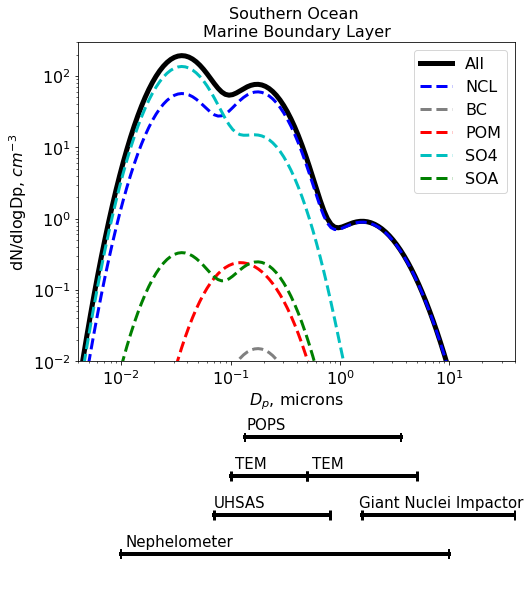

In [111]:




xmin = 0.004
xmax = 40
ymin = 0.01
ymax = 300


fs = 16
from matplotlib.ticker import ScalarFormatter

# setup figure space
fig = plt.figure(figsize = (9,9))
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[1,0.5],
             wspace=0.4, hspace=0.3, top=0.95, bottom=0.1, left=0.17, right=0.845) 

# # ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,0])



plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='black',ls = '-',linewidth = 5, 
         label = 'All', alpha = 1)
plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='b',ls = '--',linewidth = 3, 
         label = 'NCL', alpha = 1)
plt.plot(Dp_mid_microns,MBL_bc_dNdlogDp_CAM6,color='grey',ls = '--',linewidth = 3, 
         label = 'BC', alpha = 1)
plt.plot(Dp_mid_microns,MBL_pom_dNdlogDp_CAM6,color='red',ls = '--',linewidth = 3, 
         label = 'POM', alpha = 1)
plt.plot(Dp_mid_microns,MBL_so4_dNdlogDp_CAM6,color='c',ls = '--',linewidth = 3, 
         label = 'SO4', alpha = 1)
plt.plot(Dp_mid_microns,MBL_soa_dNdlogDp_CAM6,color='green',ls = '--',linewidth = 3, 
         label = 'SOA', alpha = 1)


plt.legend(fontsize = fs)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Southern Ocean \nMarine Boundary Layer', fontsize = fs) 


ax1 =plt.subplot(gs[1,0])

plt.plot([GV_UHSAS_bins[5], GV_UHSAS_bins[-8]], [2,2],
         marker = '|', ms = 10, markeredgewidth=3,color = 'k',label = None, linewidth = 4)
plt.text(0.07, 2.2, 'UHSAS', color ='k', fontsize = 15)

plt.plot([GNI_bins[0], GNI_bins[-1]], [2,2],
         marker = '|', ms = 10, markeredgewidth=3,color = 'k',label = None, linewidth = 4)
plt.text(1.5, 2.2, 'Giant Nuclei Impactor', color ='k', fontsize = 15)

plt.plot([0.1,0.5], [3,3],
         marker = '|', ms = 10, markeredgewidth=3,color = 'k',label = None, linewidth = 4)
plt.text(0.11, 3.2, 'TEM', color ='k', fontsize = 15)

plt.plot([0.5,5], [3,3],
         marker = '|', ms = 10, markeredgewidth=3, color = 'k',label = None, linewidth = 4)
plt.text(0.55, 3.2, 'TEM', color ='k', fontsize = 15)

plt.plot([0.01,10], [1,1],
         marker = '|', ms = 10, markeredgewidth=2,color = 'k',label = None, linewidth = 4)
plt.text(0.011, 1.2, 'Nephelometer', color ='k', fontsize = 15)

plt.plot([0.135, 3.615], [4,4],
         marker = '|', ms = 10, markeredgewidth=2, color = 'k',label = None, linewidth = 4)
plt.text(0.14, 4.2, 'POPS', color ='k', fontsize = 15)
plt.xscale('log')
plt.xlim(xmin,xmax)
plt.ylim(0,4.1)
plt.axis('off')

Text(0.5, 1.0, 'Southern Ocean \nMarine Boundary Layer')

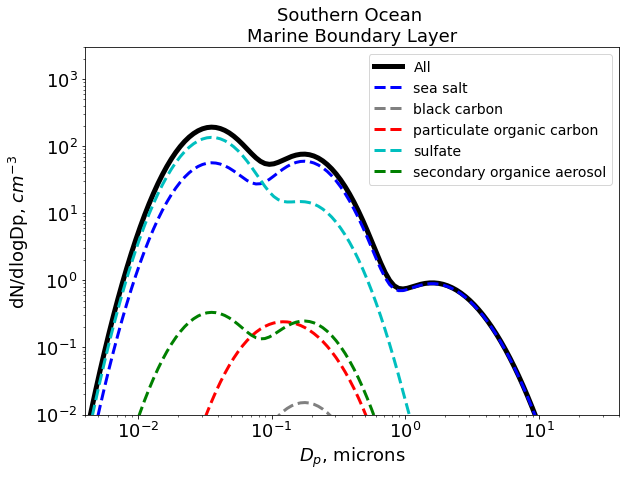

In [122]:

xmin = 0.004
xmax = 40
ymin = 0.01
ymax = 3000


fs = 18
from matplotlib.ticker import ScalarFormatter

# setup figure space
fig = plt.figure(figsize = (11,6))
gs = gridspec.GridSpec(1, 1, width_ratios=[1], 
             wspace=0.4, hspace=0.3, top=0.95, bottom=0.1, left=0.17, right=0.845) 

# # ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,0])



plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='black',ls = '-',linewidth = 5, 
         label = 'All', alpha = 1)
plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='b',ls = '--',linewidth = 3, 
         label = 'sea salt', alpha = 1)
plt.plot(Dp_mid_microns,MBL_bc_dNdlogDp_CAM6,color='grey',ls = '--',linewidth = 3, 
         label = 'black carbon', alpha = 1)
plt.plot(Dp_mid_microns,MBL_pom_dNdlogDp_CAM6,color='red',ls = '--',linewidth = 3, 
         label = 'particulate organic carbon', alpha = 1)
plt.plot(Dp_mid_microns,MBL_so4_dNdlogDp_CAM6,color='c',ls = '--',linewidth = 3, 
         label = 'sulfate', alpha = 1)
plt.plot(Dp_mid_microns,MBL_soa_dNdlogDp_CAM6,color='green',ls = '--',linewidth = 3, 
         label = 'secondary organice aerosol', alpha = 1)


plt.legend(fontsize = 14)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Southern Ocean \nMarine Boundary Layer', fontsize = fs) 


## 

Text(0.5, 1.0, 'Marine Boundary Layer')

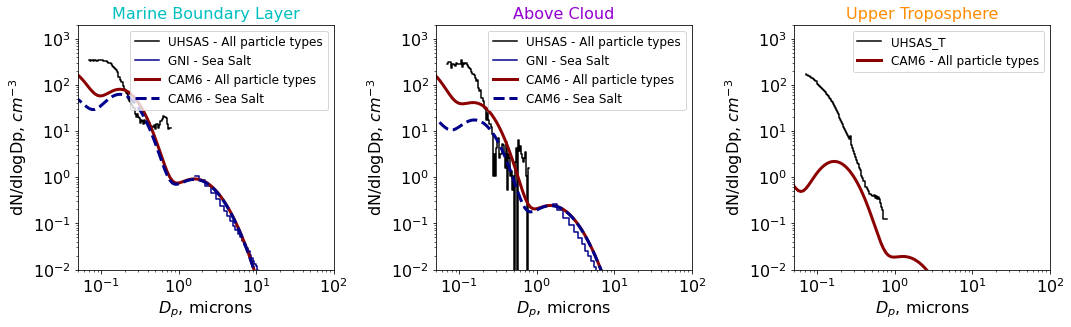

In [14]:




xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000


fs = 16


# setup figure space
fig = plt.figure(figsize = (20,4))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1],
             wspace=0.4, hspace=0.3, top=0.95, bottom=0.1, left=0.17, right=0.845) 

# # ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,2])
plt.loglog(GV_UHSAS_bins[5:-8],UT_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS_T')

# plt.loglog(GNI_bins,UT_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - No Data')

plt.plot(Dp_mid_microns,UT_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CAM6 - All particle types', alpha = 1)


plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Upper Troposphere', fontsize = fs, color = 'darkorange')

# ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,1])

plt.loglog(GV_UHSAS_bins[5:-8],AC_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

plt.loglog(GNI_bins,AC_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - Sea Salt')

plt.plot(Dp_mid_microns,AC_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CAM6 - All particle types')
plt.plot(Dp_mid_microns,AC_ncl_dNdlogDp_CAM6,color='darkblue',ls = '--',linewidth = 3, label = 'CAM6 - Sea Salt', alpha = 1)

plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Above Cloud', fontsize = fs, color = 'darkviolet')

# ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,0])


plt.loglog(GV_UHSAS_bins[5:-8],MBL_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

plt.loglog(GNI_bins,MBL_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - Sea Salt')

plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CAM6 - All particle types', alpha = 1)
plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='darkblue',ls = '--',linewidth = 3, label = 'CAM6 - Sea Salt', alpha = 1)


plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Marine Boundary Layer', fontsize = fs, color = 'c')

# plt.savefig(save_directory+'aerosol_sd_CAM_UHSAS_GNI.png', 
#             dpi = 300,bbox_inches = "tight" )

In [15]:
all_df.columns

Index(['startdatetime', 'enddatetime', 'GNI_Z', 'lon', 'GNI_lat', 'P', 'RH',
       'T', 'Ts', 'w', 'ws', 'Tdiff', 'Ncn', 'GF', 'n1p4', 'Msalt', 'CVINLET',
       'cwc_cdp', 'Unnamed: 0', 'Unnamed: 0.1', 'pressure', 'lat', 'lon',
       'relhum', 'temp', 'cwc_cdp', 'w', 'Z', 'Ncn', 'ws', 'CVINLET', 'CVTS',
       'PLWCC', 'LWC2DC', 'nUHSAS_full', 'nUHSAS_CVI_full', 'nUHSAS_full_rm',
       'nUHSAS_CVI_full_rm', 'nUHSAS_CVI_trunc', 'nUHSAS_CVI_trunc_rm',
       'nUHSAS_trunc', 'nUHSAS_trunc_rm', 'CAM_pressure', 'CAM_lat', 'CAM_lon',
       'CAM_Z', 'CAM_Temp', 'CAM_RH', 'CAM_ws', 'CAM_ws_surf', 'CAM_T_surf',
       'CAM_dst_n500', 'CAM_dst_SA', 'CAM_ss_SA_tot', 'CAM_ss_SA_sub',
       'CAM_N_UHSAS', 'CAM_N_GNI', 'Fbc01', 'Fdst01', 'Fdst03', 'Fncl01',
       'Fncl02', 'Fncl03', 'Fpom01', 'Fpom04', 'Fso401', 'Fso402', 'Fso403',
       'Fsoa01', 'Fsoa02', 'num01', 'num02', 'num03', 'num04', 'dngd01',
       'dngd02', 'dngd03', 'dngd04', 'N_TEMsml', 'N_TEMlrg'],
      dtype='object')

In [16]:
def add_height_boundries(xmin, xmax):
    plt.plot([xmin, xmax],[MBL_min_Z/1000.,MBL_min_Z/1000.], ls = '--', color = 'c')
    plt.plot([xmin, xmax],[MBL_max_Z/1000.,MBL_max_Z/1000.], ls = '--', color = 'c')
    plt.plot([xmin, xmax],[AC_min_Z/1000.,AC_min_Z/1000.], ls = '--', color = 'darkviolet')
    plt.plot([xmin, xmax],[AC_max_Z/1000.,AC_max_Z/1000.], ls = '--', color = 'darkviolet')
#     plt.plot([xmin, xmax],[UT_min_Z/1000.,UT_min_Z/1000.], ls = '--', color = 'darkorange')
#     plt.plot([xmin, xmax],[UT_max_Z/1000.,UT_max_Z/1000.], ls = '--', color = 'darkorange')

Text(0.5, 1.0, 'Marine Boundary Layer')

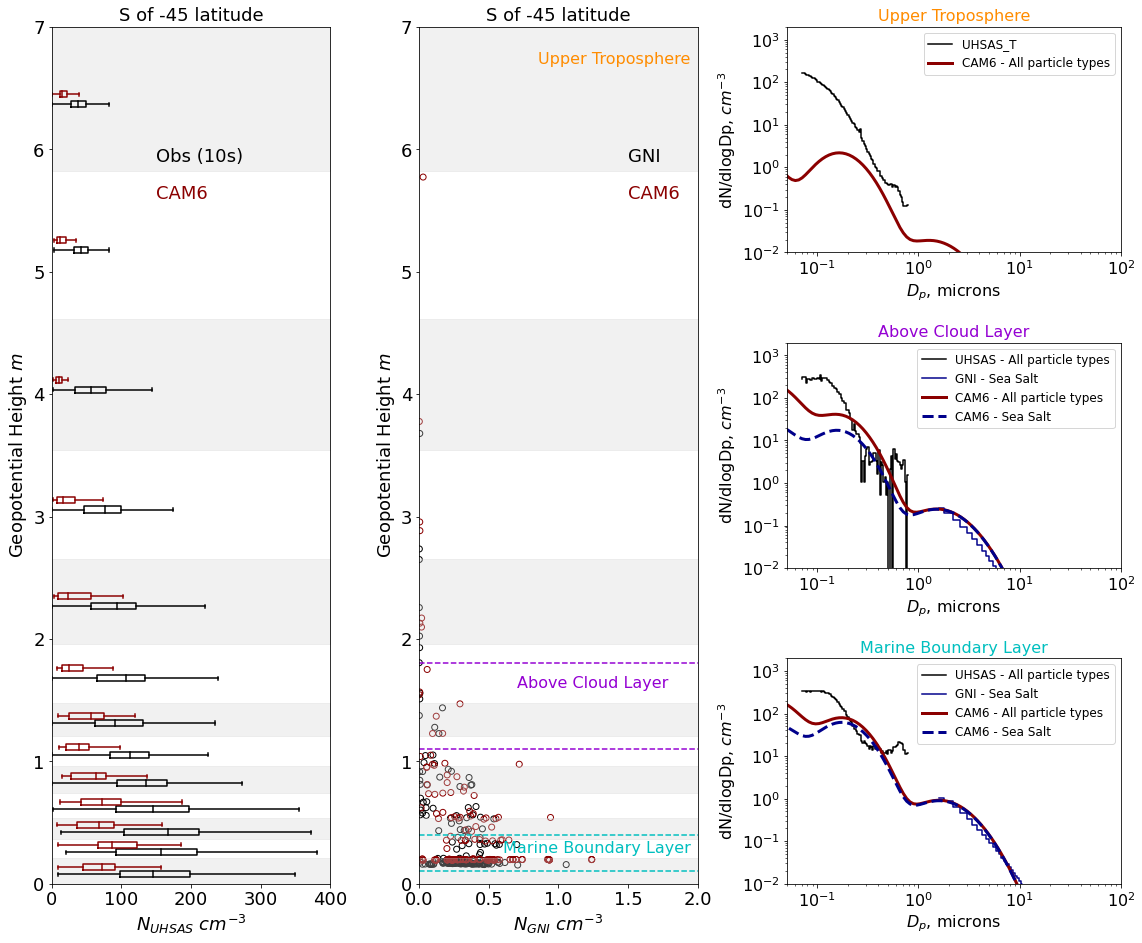

In [17]:
# Define props

whiskerpropsOBS = dict(linewidth=1.5, color='k')
cappropsOBS=dict(linewidth=1.5, color='k')

boxpropsOBS = dict(linewidth=1.5, color='k')
medianpropsOBS = dict(linewidth=1.5, color='k')

whiskerpropsCAM = dict(linewidth=1.5, color='darkred')
cappropsCAM=dict(linewidth=1.5, color='darkred')

boxpropsCAM = dict(linewidth=1.5, color='darkred')
medianpropsCAM = dict(linewidth=1.5, color='darkred')

####### ####### ####### ####### ####### 
### B - ALL SURFACE AREA DATA  ###### ####### 
####### ####### ####### ####### ####### 
fig = plt.figure(figsize = (22,14))

gs = gridspec.GridSpec(3, 3, width_ratios=[1,1,1.2],
         wspace=0.3, hspace=0.4, top=0.95, bottom=0.1, left=0.17, right=0.845) 

# ----------------------------------------------------------------------------------------
plt.subplot(gs[:,0])

# plt.scatter(df.nUHSAS_trunc_rm,df.Z/1000, color = 'none', edgecolor = 'grey', alpha = 0.1)
# plt.scatter(df.CAM_N_UHSAS/m3tocm3,df.CAM_Z/1000, color = 'none', edgecolor = 'darkred', alpha = 0.1)

# bin data

xmin = 0 
xmax = 400 


for i in range(len(CAM_Z_int)-1):
    
    a = CAM_Z_int[i]/1000.
    b = CAM_Z_int[i+1]/1000.
    
    if b >= 1.5:
        spacer = 0.04
        
    if b < 1.5:
        spacer = 0.03
    
    case = (df.relhum<90) & (df.Z>(a*1000.)) & (df.Z<=(b*1000.))& (df.lat<=-45)
    SOC = df.nUHSAS_trunc_rm[case]
    
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=((a+b)/2.)*range(1, 1+1)-spacer, 
                    widths = 0.05, boxprops=boxpropsOBS, medianprops=medianpropsOBS, 
                    capprops=cappropsOBS, whiskerprops=whiskerpropsOBS)
    
    case = (df.relhum<90) & (df.CAM_Z>(a*1000.)) & (df.CAM_Z<=(b*1000.))& (df.CAM_lat<=-45)
    SOC = df.CAM_N_UHSAS[case]/m3tocm3
    
        
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=spacer+((a+b)/2.)*range(1, 1+1), 
                    widths = 0.05, boxprops=boxpropsCAM, medianprops=medianpropsCAM, 
                    capprops=cappropsCAM, whiskerprops=whiskerpropsCAM)
        
    if (i % 2) == 0:
        plt.fill_between([xmin,xmax],[a,a],[b,b], color = 'lightgrey', alpha = 0.3)
    

# make a fake legend 
plt.text(150,5.9, 'Obs (10s)', color = 'k', fontsize = 18)
plt.text(150,5.6, 'CAM6', color = 'darkred', fontsize = 18)

# Plot properties
ax = plt.gca(); # grab the current axis
plt.xlim([xmin,xmax])
ax.set_xticks(np.arange(0,401,100))
ax.set_xticklabels(np.arange(0,401,100),fontsize = 18)
plt.ylim([0,7])
plt.yticks([0,1,2,3,4,5,6,7],['0','1','2','3','4','5','6','7'],fontsize =18)
ax.set_ylabel('Geopotential Height $m$', fontsize = 18)
# add_height_boundries(0,250)
# plt.text(175, 0.33,'below cloud', fontsize = 12, color = 'c')
# plt.text(175, 1.9,'above cloud', fontsize = 12, color = 'darkviolet')
ax.set_xlabel('$N_{UHSAS}$ $cm^{-3}$', fontsize = 18)
ax.set_title('S of -45 latitude', fontsize = 18)


# ----------------------------------------------------------------------------------------
plt.subplot(gs[:,1])

plt.scatter(all_df.n1p4*m3tocm3,all_df.GNI_Z/1000, color = 'none', edgecolor = 'k')
plt.scatter(all_df.CAM_N_GNI/m3tocm3,all_df.CAM_Z/1000, color = 'none', edgecolor = 'darkred')

for i in range(len(CAM_Z_int)-1):
    a = CAM_Z_int[i]/1000
    b = CAM_Z_int[i+1]/1000
    if (i % 2) == 0:
        plt.fill_between([xmin,xmax],[a,a],[b,b], color = 'lightgrey', alpha = 0.3)
    
# make a fake legend 
plt.text(1.5,5.9, 'GNI', color = 'k', fontsize = 18)
plt.text(1.5,5.6, 'CAM6', color = 'darkred', fontsize = 18)

# Plot properties
ax = plt.gca(); # grab the current axis
plt.xlim([0,2])
ax.set_xticks(np.arange(0,2.1,0.5))
ax.set_xticklabels(np.arange(0,2.1,0.5),fontsize = 18)
add_height_boundries(0,2)
plt.text(0.6, 0.25,'Marine Boundary Layer', fontsize = 16, color = 'c')
plt.text(0.7, 1.6,'Above Cloud Layer', fontsize = 16, color = 'darkviolet')
plt.text(0.85, 6.7, 'Upper Troposphere', fontsize = 16, color = 'darkorange')
plt.ylim([0,7])
plt.yticks([0,1,2,3,4,5,6,7],['0','1','2','3','4','5','6','7'],fontsize =18)
ax.set_ylabel('Geopotential Height $m$', fontsize = 18)
ax.set_xlabel('$N_{GNI}$ $cm^{-3}$', fontsize = 18)
ax.set_title('S of -45 latitude', fontsize = 18)


# # ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,2])
xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000


plt.loglog(GV_UHSAS_bins[5:-8],UT_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS_T')

# plt.loglog(GNI_bins,UT_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - No Data')

plt.plot(Dp_mid_microns,UT_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CAM6 - All particle types', alpha = 1)


plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Upper Troposphere', fontsize = fs, color = 'darkorange')

# ----------------------------------------------------------------------------------------
ax1 =plt.subplot(gs[1,2])
xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000

plt.loglog(GV_UHSAS_bins[5:-8],AC_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

plt.loglog(GNI_bins,AC_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - Sea Salt')

plt.plot(Dp_mid_microns,AC_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CAM6 - All particle types')
plt.plot(Dp_mid_microns,AC_ncl_dNdlogDp_CAM6,color='darkblue',ls = '--',linewidth = 3, label = 'CAM6 - Sea Salt', alpha = 1)

plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Above Cloud Layer', fontsize = fs, color = 'darkviolet')

# ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[2,2])
xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000


plt.loglog(GV_UHSAS_bins[5:-8],MBL_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

plt.loglog(GNI_bins,MBL_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - Sea Salt')

plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CAM6 - All particle types', alpha = 1)
plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='darkblue',ls = '--',linewidth = 3, label = 'CAM6 - Sea Salt', alpha = 1)


plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Marine Boundary Layer', fontsize = fs, color = 'c')


# plt.savefig(save_directory+'nUHSAS_nGNI_sd_vert_dist_obsCAM6.png', 
#             dpi = 300,bbox_inches = "tight" )

Text(0.5, 1.0, 'S of -45 latitude')

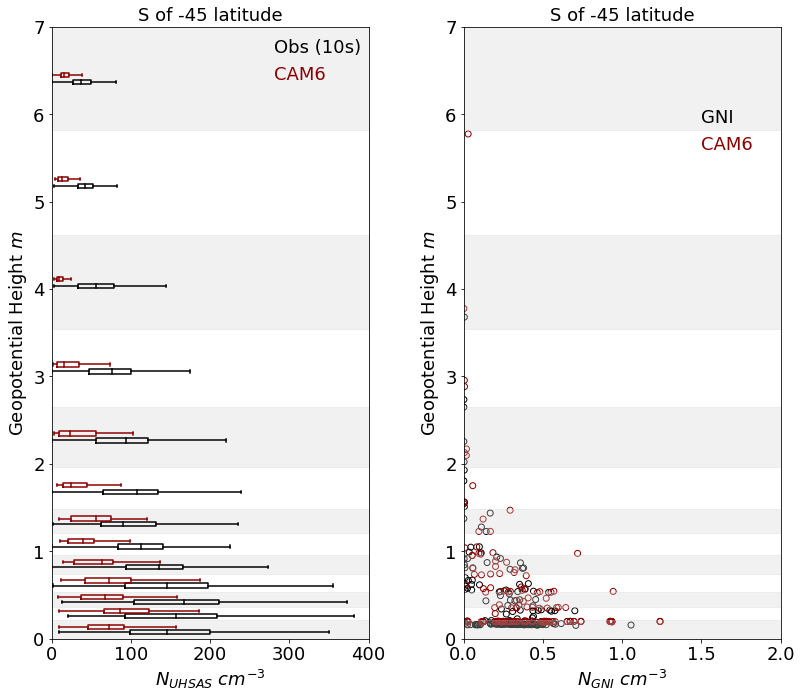

In [18]:
# Define props

whiskerpropsOBS = dict(linewidth=1.5, color='k')
cappropsOBS=dict(linewidth=1.5, color='k')

boxpropsOBS = dict(linewidth=1.5, color='k')
medianpropsOBS = dict(linewidth=1.5, color='k')

whiskerpropsCAM = dict(linewidth=1.5, color='darkred')
cappropsCAM=dict(linewidth=1.5, color='darkred')

boxpropsCAM = dict(linewidth=1.5, color='darkred')
medianpropsCAM = dict(linewidth=1.5, color='darkred')

####### ####### ####### ####### ####### 
### B - ALL SURFACE AREA DATA  ###### ####### 
####### ####### ####### ####### ####### 
fig = plt.figure(figsize = (15,10))

gs = gridspec.GridSpec(1, 2, width_ratios=[1,1],
         wspace=0.3, hspace=0.4, top=0.95, bottom=0.1, left=0.17, right=0.845) 

# ----------------------------------------------------------------------------------------
plt.subplot(gs[0,0])

# plt.scatter(df.nUHSAS_trunc_rm,df.Z/1000, color = 'none', edgecolor = 'grey', alpha = 0.1)
# plt.scatter(df.CAM_N_UHSAS/m3tocm3,df.CAM_Z/1000, color = 'none', edgecolor = 'darkred', alpha = 0.1)

# bin data

xmin = 0 
xmax = 400 

for i in range(len(CAM_Z_int)-1):
    
    a = CAM_Z_int[i]/1000.
    b = CAM_Z_int[i+1]/1000.
    
    if b >= 1.5:
        spacer = 0.04
        
    if b < 1.5:
        spacer = 0.03
    
    case = (df.relhum<90) & (df.Z>(a*1000.)) & (df.Z<=(b*1000.))& (df.lat<=-45)
    SOC = df.nUHSAS_trunc_rm[case]
    
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=((a+b)/2.)*range(1, 1+1)-spacer, 
                    widths = 0.05, boxprops=boxpropsOBS, medianprops=medianpropsOBS, 
                    capprops=cappropsOBS, whiskerprops=whiskerpropsOBS)
    
    case = (df.relhum<90) & (df.CAM_Z>(a*1000.)) & (df.CAM_Z<=(b*1000.))& (df.CAM_lat<=-45)
    SOC = df.CAM_N_UHSAS[case]/m3tocm3
    
        
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=spacer+((a+b)/2.)*range(1, 1+1), 
                    widths = 0.05, boxprops=boxpropsCAM, medianprops=medianpropsCAM, 
                    capprops=cappropsCAM, whiskerprops=whiskerpropsCAM)
        
    if (i % 2) == 0:
        plt.fill_between([xmin,xmax],[a,a],[b,b], color = 'lightgrey', alpha = 0.3)
    

# make a fake legend 
plt.text(280,6.7, 'Obs (10s)', color = 'k', fontsize = 18)
plt.text(280,6.4, 'CAM6', color = 'darkred', fontsize = 18)

# Plot properties
ax = plt.gca(); # grab the current axis
plt.xlim([xmin,xmax])
ax.set_xticks(np.arange(0,401,100))
ax.set_xticklabels(np.arange(0,401,100),fontsize = 18)
plt.ylim([0,7])
plt.yticks([0,1,2,3,4,5,6,7],['0','1','2','3','4','5','6','7'],fontsize =18)
ax.set_ylabel('Geopotential Height $m$', fontsize = 18)
# add_height_boundries(0,250)
# plt.text(175, 0.33,'below cloud', fontsize = 12, color = 'c')
# plt.text(175, 1.9,'above cloud', fontsize = 12, color = 'darkviolet')
ax.set_xlabel('$N_{UHSAS}$ $cm^{-3}$', fontsize = 18)
ax.set_title('S of -45 latitude', fontsize = 18)


# ----------------------------------------------------------------------------------------
plt.subplot(gs[0,1])

plt.scatter(all_df.n1p4*m3tocm3,all_df.GNI_Z/1000, color = 'none', edgecolor = 'k')
plt.scatter(all_df.CAM_N_GNI/m3tocm3,all_df.CAM_Z/1000, color = 'none', edgecolor = 'darkred')

for i in range(len(CAM_Z_int)-1):
    a = CAM_Z_int[i]/1000
    b = CAM_Z_int[i+1]/1000
    if (i % 2) == 0:
        plt.fill_between([xmin,xmax],[a,a],[b,b], color = 'lightgrey', alpha = 0.3)
    
# make a fake legend 
plt.text(1.5,5.9, 'GNI', color = 'k', fontsize = 18)
plt.text(1.5,5.6, 'CAM6', color = 'darkred', fontsize = 18)

# Plot properties
ax = plt.gca(); # grab the current axis
plt.xlim([0,2])
ax.set_xticks(np.arange(0,2.1,0.5))
ax.set_xticklabels(np.arange(0,2.1,0.5),fontsize = 18)
# add_height_boundries(0,2)
# plt.text(0.6, 0.25,'Marine Boundary Layer', fontsize = 16, color = 'c')
# plt.text(0.7, 1.6,'Above Cloud Layer', fontsize = 16, color = 'darkviolet')
# plt.text(0.85, 6.7, 'Upper Troposphere', fontsize = 16, color = 'darkorange')
plt.ylim([0,7])
plt.yticks([0,1,2,3,4,5,6,7],['0','1','2','3','4','5','6','7'],fontsize =18)
ax.set_ylabel('Geopotential Height $m$', fontsize = 18)
ax.set_xlabel('$N_{GNI}$ $cm^{-3}$', fontsize = 18)
ax.set_title('S of -45 latitude', fontsize = 18)




# plt.savefig(save_directory+'nUHSAS_nGNI_sd_vert_dist_obsCAM6.png', 
#             dpi = 300,bbox_inches = "tight" )

0.33139756077986726
0.1954148270266572


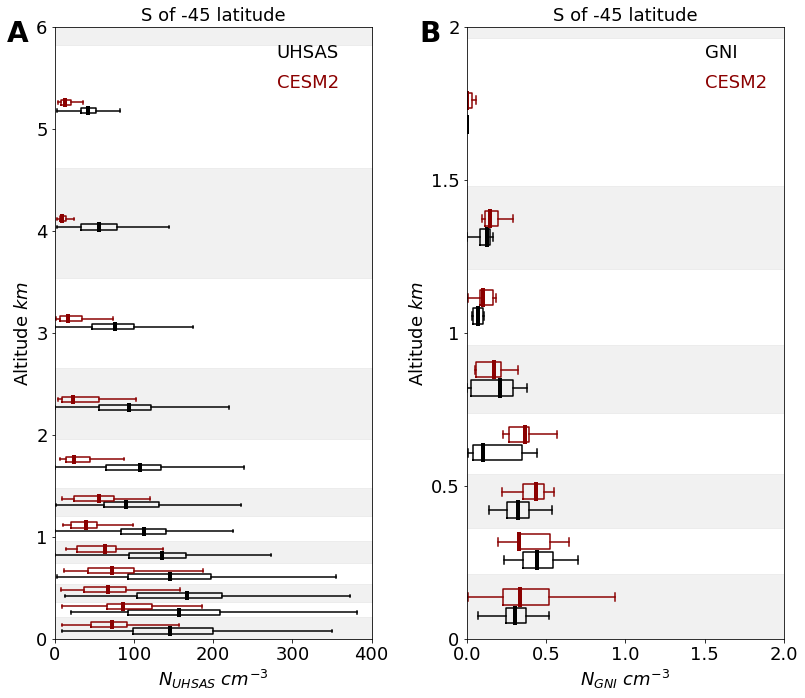

In [19]:
# Define props

whiskerpropsOBS = dict(linewidth=1.5, color='k')
cappropsOBS=dict(linewidth=1.5, color='k')

boxpropsOBS = dict(linewidth=1.5, color='k')
medianpropsOBS = dict(linewidth=4, color='k')
# medianpropsOBS = dict(marker='s', markeredgecolor='black',
#                       markerfacecolor='grey')

whiskerpropsCAM = dict(linewidth=1.5, color='darkred')
cappropsCAM=dict(linewidth=1.5, color='darkred')

boxpropsCAM = dict(linewidth=1.5, color='darkred')
medianpropsCAM = dict(linewidth=4, color='darkred')
# medianpropsCAM = dict(linewidth = 0, marker='s', markeredgecolor='black',
#                       markerfacecolor='darkred')

####### ####### ####### ####### ####### 
### B - ALL SURFACE AREA DATA  ###### ####### 
####### ####### ####### ####### ####### 
fig = plt.figure(figsize = (15,10))

gs = gridspec.GridSpec(1, 2, width_ratios=[1,1],
         wspace=0.3, hspace=0.4, top=0.95, bottom=0.1, left=0.17, right=0.845) 

# ----------------------------------------------------------------------------------------
plt.subplot(gs[0,0])

# plt.scatter(df.nUHSAS_trunc_rm,df.Z/1000, color = 'none', edgecolor = 'grey', alpha = 0.1)
# plt.scatter(df.CAM_N_UHSAS/m3tocm3,df.CAM_Z/1000, color = 'none', edgecolor = 'darkred', alpha = 0.1)

# bin data

xmin = 0 
xmax = 400 

for i in range(len(CAM_Z_int)-1):
    
    a = CAM_Z_int[i]/1000.
    b = CAM_Z_int[i+1]/1000.
    
    if b >= 1.5:
        spacer = 0.04
        
    if b < 1.5:
        spacer = 0.03
    
    case = (df.relhum<90) & (df.Z>(a*1000.)) & (df.Z<=(b*1000.))& (df.lat<=-45)
    SOC = df.nUHSAS_trunc_rm[case]
#     print('Z = '+str("%.2f" % ((a+b)/2.))+'km')
#     print('obs med = '+str("%.2f" % np.median(SOC[~np.isnan(SOC)])))
#     print('obs quart = '+str("%.2f" % np.quantile(SOC[~np.isnan(SOC)],.25))+ ' - ' +str("%.2f" % np.quantile(SOC[~np.isnan(SOC)],.75)))

    
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=((a+b)/2.)*range(1, 1+1)-spacer, 
                    widths = 0.05, boxprops=boxpropsOBS, medianprops=medianpropsOBS, 
                    capprops=cappropsOBS, whiskerprops=whiskerpropsOBS)
    
    case = (df.relhum<90) & (df.CAM_Z>(a*1000.)) & (df.CAM_Z<=(b*1000.))& (df.CAM_lat<=-45)
    SOC = df.CAM_N_UHSAS[case]/m3tocm3
    
#     print('Z = '+str("%.2f" % ((a+b)/2.))+'km')
#     print('CAM med = '+str("%.2f" % np.median(SOC[~np.isnan(SOC)])))
#     print('CAM quart = '+str("%.2f" % np.quantile(SOC[~np.isnan(SOC)],.25))+ ' - ' +str("%.2f" % np.quantile(SOC[~np.isnan(SOC)],.75)))
        
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=spacer+((a+b)/2.)*range(1, 1+1), 
                    widths = 0.05, boxprops=boxpropsCAM, medianprops=medianpropsCAM, 
                    capprops=cappropsCAM, whiskerprops=whiskerpropsCAM)
        
    if (i % 2) == 0:
        plt.fill_between([xmin,xmax],[a,a],[b,b], color = 'lightgrey', alpha = 0.3)
    

# make a fake legend 
plt.text(280,5.7, 'UHSAS', color = 'k', fontsize = 18)
plt.text(280,5.4, 'CESM2', color = 'darkred', fontsize = 18)
plt.text(-60,5.85, 'A', color = 'k', fontsize = 28,weight='bold')

# Plot properties
ax = plt.gca(); # grab the current axis
plt.xlim([xmin,xmax])
ax.set_xticks(np.arange(0,401,100))
ax.set_xticklabels(np.arange(0,401,100),fontsize = 18)
plt.ylim([0,6])
plt.yticks([0,1,2,3,4,5,6],['0','1','2','3','4','5','6'],fontsize =18)
ax.set_ylabel('Altitude $km$', fontsize = 18)
# add_height_boundries(0,250)
# plt.text(175, 0.33,'below cloud', fontsize = 12, color = 'c')
# plt.text(175, 1.9,'above cloud', fontsize = 12, color = 'darkviolet')
ax.set_xlabel('$N_{UHSAS}$ $cm^{-3}$', fontsize = 18)
ax.set_title('S of -45 latitude', fontsize = 18)


# ----------------------------------------------------------------------------------------
plt.subplot(gs[0,1])



for i in range(len(CAM_Z_int)-1):
    
    a = CAM_Z_int[i]/1000.
    b = CAM_Z_int[i+1]/1000.
    
    if b >= 1.5:
        spacer = 0.04
        
    if b < 1.5:
        spacer = 0.03
    
    case = (all_df.RH<90) & (all_df.GNI_Z>(a*1000.)) & (all_df.GNI_Z<=(b*1000.))& (all_df.GNI_lat<=-45)
    SOC = all_df.n1p4[case]*m3tocm3
    
#     print('Z = '+str("%.2f" % ((a+b)/2.))+'km')
#     print('obs med = '+str("%.2f" % np.median(SOC[~np.isnan(SOC)])))
#     print('obs quart = '+str("%.2f" % np.quantile(SOC[~np.isnan(SOC)],.25))+ ' - ' +str("%.2f" % np.quantile(SOC[~np.isnan(SOC)],.75)))

    
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=((a+b)/2.)*range(1, 1+1)-spacer, 
                    widths = 0.05, boxprops=boxpropsOBS, medianprops=medianpropsOBS, 
                    capprops=cappropsOBS, whiskerprops=whiskerpropsOBS)
    
    case = (all_df.RH<90) & (all_df.CAM_Z>(a*1000.)) & (all_df.CAM_Z<=(b*1000.))& (all_df.CAM_lat<=-45)
    SOC = all_df.CAM_N_GNI[case]/m3tocm3
    
    if i == 1:
        print(np.median(SOC[~np.isnan(SOC)].values))
        print(np.percentile(SOC[~np.isnan(SOC)].values, 0.5))
    
#     print('Z = '+str("%.2f" % ((a+b)/2.))+'km')
#     print('CAM med = '+str("%.2f" % np.median(SOC[~np.isnan(SOC)])))
#     print('CAM quart = '+str("%.2f" % np.quantile(SOC[~np.isnan(SOC)],.25))+ ' - ' +str("%.2f" % np.quantile(SOC[~np.isnan(SOC)],.75)))

        
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=spacer+((a+b)/2.)*range(1, 1+1), 
                    widths = 0.05, boxprops=boxpropsCAM, medianprops=medianpropsCAM, 
                    capprops=cappropsCAM, whiskerprops=whiskerpropsCAM)
    
        
    if (i % 2) == 0:
        plt.fill_between([xmin,xmax],[a,a],[b,b], color = 'lightgrey', alpha = 0.3)
    
    
# make a fake legend 
plt.text(1.5,1.9, 'GNI', color = 'k', fontsize = 18)
plt.text(1.5,1.8, 'CESM2', color = 'darkred', fontsize = 18)
plt.text(-0.3,1.95, 'B', color = 'k', fontsize = 28,weight='bold')

# Plot properties
ax = plt.gca(); # grab the current axis
plt.xlim([0,2])
ax.set_xticks(np.arange(0,2.1,0.5))
ax.set_xticklabels(np.arange(0,2.1,0.5),fontsize = 18)
# add_height_boundries(0,2)
# plt.text(0.6, 0.25,'Marine Boundary Layer', fontsize = 16, color = 'c')
# plt.text(0.7, 1.6,'Above Cloud Layer', fontsize = 16, color = 'darkviolet')
# plt.text(0.85, 6.7, 'Upper Troposphere', fontsize = 16, color = 'darkorange')
plt.ylim([0,2])
plt.yticks([0,0.5, 1,1.5, 2],['0','0.5','1','1.5','2'],fontsize =18)
# plt.ylim([0,6])
# plt.yticks([0,1,2,3,4,5,6],['0','1','2','3','4','5','6'],fontsize =18)
ax.set_ylabel('Altitude $km$', fontsize = 18)
ax.set_xlabel('$N_{GNI}$ $cm^{-3}$', fontsize = 18)
ax.set_title('S of -45 latitude', fontsize = 18)




plt.savefig(save_directory+'nUHSAS_nGNI_sd_vert_dist_obsCAM6.png', 
            dpi = 300,bbox_inches = "tight" )

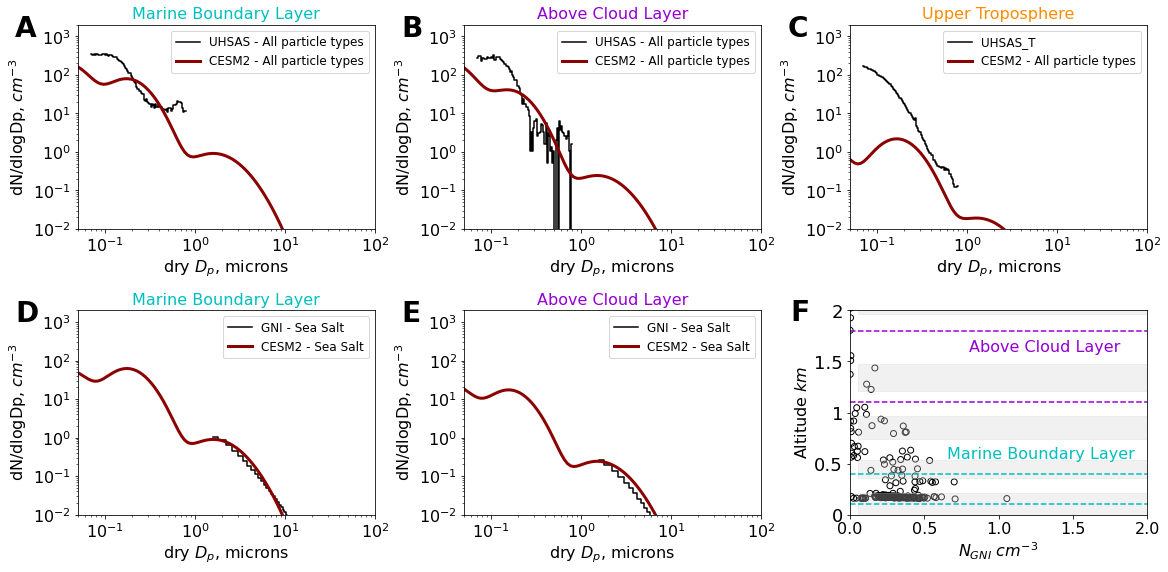

In [20]:
fig = plt.figure(figsize = (22,8))

gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,1],
         wspace=0.3, hspace=0.4, top=0.95, bottom=0.1, left=0.17, right=0.845) 
# # ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,2])
xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000


plt.loglog(GV_UHSAS_bins[5:-8],UT_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS_T')

# plt.loglog(GNI_bins,UT_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - No Data')

plt.plot(Dp_mid_microns,UT_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types', alpha = 1)


plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dry $D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Upper Troposphere', fontsize = fs, color = 'darkorange')
plt.text(1e-2,1000, 'C', color = 'k', fontsize = 28,weight='bold')

# ----------------------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,1])
xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000

plt.loglog(GV_UHSAS_bins[5:-8],AC_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

# plt.loglog(GNI_bins,AC_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - Sea Salt')

plt.plot(Dp_mid_microns,AC_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types')
# plt.plot(Dp_mid_microns,AC_ncl_dNdlogDp_CAM6,color='darkblue',ls = '--',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)

plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dry $D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Above Cloud Layer', fontsize = fs, color = 'darkviolet')
plt.text(1e-2,1000, 'B', color = 'k', fontsize = 28,weight='bold')

# ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0,0])
xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000


plt.loglog(GV_UHSAS_bins[5:-8],MBL_dNdlogDp_UHSAS[5:-8],
           drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

# plt.loglog(GNI_bins,MBL_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - Sea Salt')

plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types', alpha = 1)
# plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='darkblue',ls = '--',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)


plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dry $D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Marine Boundary Layer', fontsize = fs, color = 'c')
plt.text(1e-2,1000, 'A', color = 'k', fontsize = 28,weight='bold')


# ----------------------------------------------------------------------------------------
ax1 =plt.subplot(gs[1,1])
xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000

# plt.loglog(GV_UHSAS_bins[5:-8],AC_dNdlogDp_UHSAS[5:-8],
#            drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

plt.loglog(GNI_bins,AC_dNdlogDp_GNI,drawstyle='steps-mid',color = 'k',label = 'GNI - Sea Salt')

# plt.plot(Dp_mid_microns,AC_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types')
plt.plot(Dp_mid_microns,AC_ncl_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)

plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dry $D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Above Cloud Layer', fontsize = fs, color = 'darkviolet')
plt.text(1e-2,1000, 'E', color = 'k', fontsize = 28,weight='bold')

# ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[1,0])
xmin = 0.05
xmax = 100
ymin = 0.01
ymax = 2000


# plt.loglog(GV_UHSAS_bins[5:-8],MBL_dNdlogDp_UHSAS[5:-8],
#            drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

plt.loglog(GNI_bins,MBL_dNdlogDp_GNI,drawstyle='steps-mid',color = 'k',label = 'GNI - Sea Salt')

# plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types', alpha = 1)
plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)


plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dry $D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Marine Boundary Layer', fontsize = fs, color = 'c')
plt.text(1e-2,1000, 'D', color = 'k', fontsize = 28,weight='bold')


# ----------------------------------------------------------------------------------------
plt.subplot(gs[1,2])

plt.scatter(all_df.n1p4*m3tocm3,all_df.GNI_Z/1000, color = 'none', edgecolor = 'k')
# plt.scatter(all_df.CAM_N_GNI/m3tocm3,all_df.CAM_Z/1000, color = 'none', edgecolor = 'darkred')

for i in range(len(CAM_Z_int)-1):
    a = CAM_Z_int[i]/1000
    b = CAM_Z_int[i+1]/1000
    if (i % 2) == 0:
        plt.fill_between([xmin,xmax],[a,a],[b,b], color = 'lightgrey', alpha = 0.3)
    

# Plot properties
ax = plt.gca(); # grab the current axis
plt.xlim([0,2])
ax.set_xticks(np.arange(0,2.1,0.5))
ax.set_xticklabels(np.arange(0,2.1,0.5),fontsize = fs)
add_height_boundries(0,2)
plt.text(0.65, 0.55,'Marine Boundary Layer', fontsize = fs, color = 'c')
plt.text(0.8, 1.6,'Above Cloud Layer', fontsize = fs, color = 'darkviolet')
plt.ylim([0,2])
plt.yticks([0,0.5, 1,1.5, 2],['0','0.5','1','1.5','2'],fontsize =18)
ax.set_ylabel('Altitude $km$', fontsize = fs)
ax.set_xlabel('$N_{GNI}$ $cm^{-3}$', fontsize = fs)
plt.text(-0.4,1.9, 'F', color = 'k', fontsize = 28,weight='bold')

plt.savefig(save_directory+'Aerosol_sd_obsCAM6.png', 
            dpi = 300,bbox_inches = "tight" )


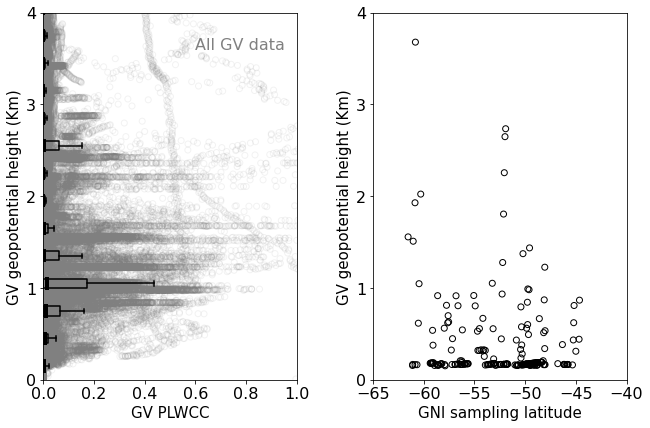

In [21]:
MBL_min_Z = 100
MBL_max_Z = 250
AC_min_Z = 1200
AC_max_Z = 1800
UT_min_Z = 5500
UT_max_Z = 6500

fig = plt.figure(figsize = (12,6))
gs = gridspec.GridSpec(1,2, width_ratios=[1,1],
             wspace=0.3, hspace=0.3, top=0.95, bottom=0.1, left=0.17, right=0.845) 

ax1 = plt.subplot(gs[0,0])

plt.scatter(df.PLWCC, df.Z/1000., color='none',marker='o',linewidth = 1, edgecolor = 'grey', alpha = 0.1)

# Bin data
y_bin = np.arange(0,6.01, 0.3)
N_y = len(y_bin)
y_plot = (y_bin[1:]+y_bin[0:-1])/2.
dy = np.diff(y_bin); dy = dy[0];

SOC_median_NUHSAS = [0 for y_bin in range(len(y_bin)-1)]

for i in range(len(y_bin)-1):
    
    a = y_bin[i]
    b = y_bin[i+1]
    
    case = (df.Z>(a*1000.)) & (df.Z<=(b*1000.))& (df.lat<=-45)
    SOC = df.PLWCC[case]
    SOC_median_NUHSAS[i] = np.nanpercentile(SOC,50)
    
    plot2 = plt.boxplot(SOC[~np.isnan(SOC)].values, showfliers=False, vert = False, positions=((a+b)/2.)*range(1, 1+1), 
                    widths = 0.1, boxprops=boxpropsOBS, medianprops=medianpropsOBS, 
                    capprops=cappropsOBS, whiskerprops=whiskerpropsOBS)

# Plot properties
ax = plt.gca(); # grab the current axis


plt.xlabel('GV PLWCC', fontsize =15)
plt.ylabel('GV geopotential height (Km)', fontsize = 15)
plt.ylim(0,4)
plt.yticks([0,1,2,3,4],['0','1','2','3','4'],fontsize =18)
xmin = 0
xmax = 1
plt.xlim(xmin,xmax)
# plt.plot([xmin,xmax],[MBL_min_Z/1000.,MBL_min_Z/1000.], ls = '--', color = 'c')
# plt.plot([xmin,xmax],[MBL_max_Z/1000.,MBL_max_Z/1000.], ls = '--', color = 'c')
# plt.plot([xmin,xmax],[AC_min_Z/1000.,AC_min_Z/1000.], ls = '--', color = 'darkviolet')
# plt.plot([xmin,xmax],[AC_max_Z/1000.,AC_max_Z/1000.], ls = '--', color = 'darkviolet')
# plt.plot([xmin,xmax],[UT_min_Z/1000.,UT_min_Z/1000.], ls = '--', color = 'darkorange')
# plt.plot([xmin,xmax],[UT_max_Z/1000.,UT_max_Z/1000.], ls = '--', color = 'darkorange')
# plt.text(0.7, 0.35,'below cloud', fontsize = 12, color = 'c')
# plt.text(0.7, 1.5,'above cloud', fontsize = 12, color = 'darkviolet')
# plt.text(0.55, 6,'Upper troposphere', fontsize = 12, color = 'darkorange')
plt.text(0.6, 3.6,'All GV data', fontsize = 16, color = 'grey')
plt.tick_params(axis='both', which='major', labelsize=16)



ax1 = plt.subplot(gs[0,1])

plt.scatter(df_GNI.GNI_lat, df_GNI.GNI_Z/1000., color='none',marker='o',linewidth = 1, edgecolor = 'k')

plt.xlabel('GNI sampling latitude', fontsize =15)
plt.ylabel('GV geopotential height (Km)', fontsize = 15)
# plt.plot([-70,-40],[MBL_min_Z/1000.,MBL_min_Z/1000.], ls = '--', color = 'c')
# plt.plot([-70,-40],[MBL_max_Z/1000.,MBL_max_Z/1000.], ls = '--', color = 'c')
# plt.plot([-70,-40],[AC_min_Z/1000.,AC_min_Z/1000.], ls = '--', color = 'darkviolet')
# plt.plot([-70,-40],[AC_max_Z/1000.,AC_max_Z/1000.], ls = '--', color = 'darkviolet')
# plt.plot([-70,-40],[UT_min_Z/1000.,UT_min_Z/1000.], ls = '--', color = 'darkorange')
# plt.plot([-70,-40],[UT_max_Z/1000.,UT_max_Z/1000.], ls = '--', color = 'darkorange')
# plt.plot([-70,-40],[4,4], ls = '--', color = 'grey')
# plt.text(-64.8, 0.35,'below cloud', fontsize = 12, color = 'c')
# plt.text(-47, 1.5,'above cloud', fontsize = 12, color = 'darkviolet')
# plt.text(-52, 6,'Upper troposphere', fontsize = 12, color = 'darkorange')
plt.ylim(0,4)
plt.yticks([0,1,2,3,4],['0','1','2','3','4'],fontsize =18)
plt.xlim(-65,-40)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.savefig(save_directory+'SOCRATES_GNI_sample_latitudes_altitudes_PLWCC.png', 
            dpi = 300,bbox_inches = "tight" )


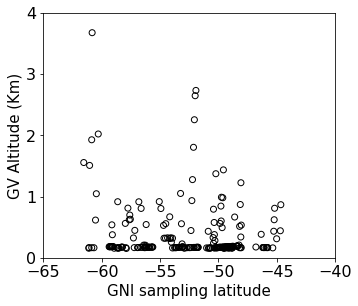

In [22]:
MBL_min_Z = 100
MBL_max_Z = 250
AC_min_Z = 1200
AC_max_Z = 1800
UT_min_Z = 5500
UT_max_Z = 6500

fig = plt.figure(figsize = (6,4))
gs = gridspec.GridSpec(1,1, width_ratios=[1],
             wspace=0.3, hspace=0.3, top=0.95, bottom=0.1, left=0.17, right=0.845) 

ax1 = plt.subplot(gs[0,0])

plt.scatter(df_GNI.GNI_lat, df_GNI.GNI_Z/1000., color='none',marker='o',linewidth = 1, edgecolor = 'k')

plt.xlabel('GNI sampling latitude', fontsize =15)
plt.ylabel('GV Altitude (Km)', fontsize = 15)
# plt.plot([-70,-40],[MBL_min_Z/1000.,MBL_min_Z/1000.], ls = '--', color = 'c')
# plt.plot([-70,-40],[MBL_max_Z/1000.,MBL_max_Z/1000.], ls = '--', color = 'c')
# plt.plot([-70,-40],[AC_min_Z/1000.,AC_min_Z/1000.], ls = '--', color = 'darkviolet')
# plt.plot([-70,-40],[AC_max_Z/1000.,AC_max_Z/1000.], ls = '--', color = 'darkviolet')
# plt.plot([-70,-40],[UT_min_Z/1000.,UT_min_Z/1000.], ls = '--', color = 'darkorange')
# plt.plot([-70,-40],[UT_max_Z/1000.,UT_max_Z/1000.], ls = '--', color = 'darkorange')
# plt.plot([-70,-40],[4,4], ls = '--', color = 'grey')
# plt.text(-64.8, 0.35,'below cloud', fontsize = 12, color = 'c')
# plt.text(-47, 1.5,'above cloud', fontsize = 12, color = 'darkviolet')
# plt.text(-52, 6,'Upper troposphere', fontsize = 12, color = 'darkorange')
plt.ylim(0,4)
plt.yticks([0,1,2,3,4],['0','1','2','3','4'],fontsize =18)
plt.xlim(-65,-40)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.savefig(save_directory+'SOCRATES_GNI_sample_latitudes_altitudes.png', 
            dpi = 300,bbox_inches = "tight" )


In [28]:
GV_UHSAS_bins[0]

0.060864999890327454

In [29]:
# UHSAS INstrument bounds
Dmin = GV_UHSAS_bins[0]
Dmax = GV_UHSAS_bins[-1]
MBL_UHSAS_dNdlogDp_CAM6 = MBL_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
AC_UHSAS_dNdlogDp_CAM6 = AC_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
UT_UHSAS_dNdlogDp_CAM6 = UT_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
Dp_mid_microns_UHSAS = Dp_mid_microns[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]

# GNI INstrument bounds
Dmin = GNI_bins[0]
Dmax = GNI_bins[-1]
MBL_GNI_dNdlogDp_CAM6 = MBL_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
AC_GNI_dNdlogDp_CAM6 = AC_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
UT_GNI_dNdlogDp_CAM6 = UT_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
Dp_mid_microns_GNI = Dp_mid_microns[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]


# TEMsmall INstrument bounds
Dmin = 0.1
Dmax = 0.5
MBL_TEMs_dNdlogDp_CAM6 = MBL_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
AC_TEMs_dNdlogDp_CAM6 = AC_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
UT_TEMl_dNdlogDp_CAM6 = UT_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
Dp_mid_microns_TEMs = Dp_mid_microns[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]

# TEMsmall INstrument bounds
Dmin = 0.5
Dmax = 5
MBL_TEMl_dNdlogDp_CAM6 = MBL_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
AC_TEMl_dNdlogDp_CAM6 = AC_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
UT_TEMl_dNdlogDp_CAM6 = UT_dNdlogDp_CAM6[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]
Dp_mid_microns_TEMl = Dp_mid_microns[(Dp_mid_microns>Dmin)&(Dp_mid_microns<Dmax)]

In [33]:
np.shape(Dp_mid_microns)

(150, 1)

Text(0.01, 1000, 'C')

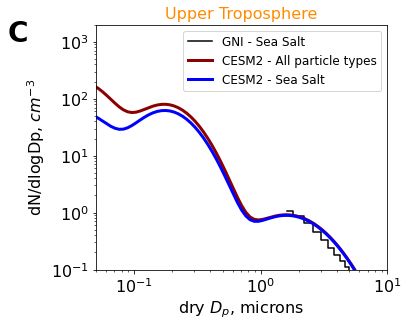

In [38]:
## figures of instrument simulators 

gs = gridspec.GridSpec(1, 1, width_ratios=[1],
         wspace=0.3, hspace=0.4, top=0.95, bottom=0.1, left=0.17, right=0.845) 
# # ----------------------------------------------------------------------------
ax1 =plt.subplot(gs[0])
xmin = 0.05
xmax = 10
ymin = 0.1
ymax = 2000


# plt.loglog(GV_UHSAS_bins[5:-8],MBL_dNdlogDp_UHSAS[5:-8],
#            drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

plt.loglog(GNI_bins,MBL_dNdlogDp_GNI,drawstyle='steps-mid',color = 'k',label = 'GNI - Sea Salt')

plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types', alpha = 1)
plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='blue',ls = '-',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)


# ax.fill_between(Dp_mid_microns[:,0], UT_dNdlogDp_CAM6, 0, color='blue', alpha=.1)

plt.legend(fontsize = fs-4)
plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dry $D_p$, microns', fontsize=fs)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.tick_params(axis='both', labelsize=fs) 
plt.title('Upper Troposphere', fontsize = fs, color = 'darkorange')
plt.text(1e-2,1000, 'C', color = 'k', fontsize = 28,weight='bold')

Text(0.01, 1000, 'C')

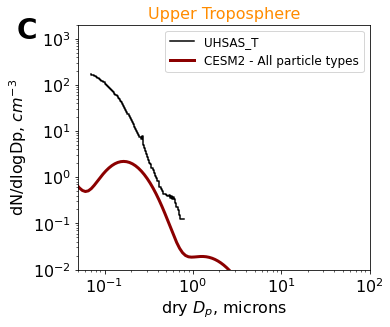

In [23]:
# # ----------------------------------------------------------------------------------------
# ax1 =plt.subplot(gs[0,1])
# xmin = 0.05
# xmax = 100
# ymin = 0.01
# ymax = 2000

# plt.loglog(GV_UHSAS_bins[5:-8],AC_dNdlogDp_UHSAS[5:-8],
#            drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

# # plt.loglog(GNI_bins,AC_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - Sea Salt')

# plt.plot(Dp_mid_microns,AC_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types')
# # plt.plot(Dp_mid_microns,AC_ncl_dNdlogDp_CAM6,color='darkblue',ls = '--',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)

# plt.legend(fontsize = fs-4)
# plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('dry $D_p$, microns', fontsize=fs)
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# plt.tick_params(axis='both', labelsize=fs) 
# plt.title('Above Cloud Layer', fontsize = fs, color = 'darkviolet')
# plt.text(1e-2,1000, 'B', color = 'k', fontsize = 28,weight='bold')

# # ----------------------------------------------------------------------------
# ax1 =plt.subplot(gs[0,0])
# xmin = 0.05
# xmax = 100
# ymin = 0.01
# ymax = 2000


# plt.loglog(GV_UHSAS_bins[5:-8],MBL_dNdlogDp_UHSAS[5:-8],
#            drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

# # plt.loglog(GNI_bins,MBL_dNdlogDp_GNI,drawstyle='steps-mid',color = 'darkblue',label = 'GNI - Sea Salt')

# plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types', alpha = 1)
# # plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='darkblue',ls = '--',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)


# plt.legend(fontsize = fs-4)
# plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('dry $D_p$, microns', fontsize=fs)
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# plt.tick_params(axis='both', labelsize=fs) 
# plt.title('Marine Boundary Layer', fontsize = fs, color = 'c')
# plt.text(1e-2,1000, 'A', color = 'k', fontsize = 28,weight='bold')


# # ----------------------------------------------------------------------------------------
# ax1 =plt.subplot(gs[1,1])
# xmin = 0.05
# xmax = 100
# ymin = 0.01
# ymax = 2000

# # plt.loglog(GV_UHSAS_bins[5:-8],AC_dNdlogDp_UHSAS[5:-8],
# #            drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

# plt.loglog(GNI_bins,AC_dNdlogDp_GNI,drawstyle='steps-mid',color = 'k',label = 'GNI - Sea Salt')

# # plt.plot(Dp_mid_microns,AC_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types')
# plt.plot(Dp_mid_microns,AC_ncl_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)

# plt.legend(fontsize = fs-4)
# plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('dry $D_p$, microns', fontsize=fs)
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# plt.tick_params(axis='both', labelsize=fs) 
# plt.title('Above Cloud Layer', fontsize = fs, color = 'darkviolet')
# plt.text(1e-2,1000, 'E', color = 'k', fontsize = 28,weight='bold')

# # ----------------------------------------------------------------------------
# ax1 =plt.subplot(gs[1,0])
# xmin = 0.05
# xmax = 100
# ymin = 0.01
# ymax = 2000


# # plt.loglog(GV_UHSAS_bins[5:-8],MBL_dNdlogDp_UHSAS[5:-8],
# #            drawstyle='steps-mid',color = 'k',label = 'UHSAS - All particle types')

# plt.loglog(GNI_bins,MBL_dNdlogDp_GNI,drawstyle='steps-mid',color = 'k',label = 'GNI - Sea Salt')

# # plt.plot(Dp_mid_microns,MBL_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - All particle types', alpha = 1)
# plt.plot(Dp_mid_microns,MBL_ncl_dNdlogDp_CAM6,color='darkred',ls = '-',linewidth = 3, label = 'CESM2 - Sea Salt', alpha = 1)


# plt.legend(fontsize = fs-4)
# plt.ylabel('dN/dlogDp, ${cm}^{-3}$', fontsize=fs)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('dry $D_p$, microns', fontsize=fs)
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# plt.tick_params(axis='both', labelsize=fs) 
# plt.title('Marine Boundary Layer', fontsize = fs, color = 'c')
# plt.text(1e-2,1000, 'D', color = 'k', fontsize = 28,weight='bold')


# # ----------------------------------------------------------------------------------------
# plt.subplot(gs[1,2])

# plt.scatter(all_df.n1p4*m3tocm3,all_df.GNI_Z/1000, color = 'none', edgecolor = 'k')
# # plt.scatter(all_df.CAM_N_GNI/m3tocm3,all_df.CAM_Z/1000, color = 'none', edgecolor = 'darkred')

# for i in range(len(CAM_Z_int)-1):
#     a = CAM_Z_int[i]/1000
#     b = CAM_Z_int[i+1]/1000
#     if (i % 2) == 0:
#         plt.fill_between([xmin,xmax],[a,a],[b,b], color = 'lightgrey', alpha = 0.3)
    

# # Plot properties
# ax = plt.gca(); # grab the current axis
# plt.xlim([0,2])
# ax.set_xticks(np.arange(0,2.1,0.5))
# ax.set_xticklabels(np.arange(0,2.1,0.5),fontsize = fs)
# add_height_boundries(0,2)
# plt.text(0.65, 0.55,'Marine Boundary Layer', fontsize = fs, color = 'c')
# plt.text(0.8, 1.6,'Above Cloud Layer', fontsize = fs, color = 'darkviolet')
# plt.ylim([0,2])
# plt.yticks([0,0.5, 1,1.5, 2],['0','0.5','1','1.5','2'],fontsize =18)
# ax.set_ylabel('Altitude $km$', fontsize = fs)
# ax.set_xlabel('$N_{GNI}$ $cm^{-3}$', fontsize = fs)
# plt.text(-0.4,1.9, 'F', color = 'k', fontsize = 28,weight='bold')